# Chose 4 different regression techniques

## Read data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

## Metrics function
Function prints out different metrics of the predictions.
- MAE
- MAPE
- RMSE
- R2

In [2]:
def print_metrics(y_hat, y_test):
    output = pd.DataFrame({'MAE': [round(np.mean(abs(y_hat-y_test)), 2)],
                   'MAPE': [round(np.mean(abs(y_hat-y_test)/y_test), 4)],
                   'RMSE': [round(np.sqrt(np.mean((y_test - y_hat)**2)), 2)],
                   ' R2': [round(metrics.r2_score(y_test, y_hat),2)]
                   })
    return output

In [147]:
wine = pd.read_csv('data/wine/winequality-white.csv', sep=';')

### Check data
`info()` method shows if there are missing values
it shows that there aren't any missing values (non-null for every feature)

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
wine.shape

(4898, 12)

## Preprocessing (without scaling)
# TODO

## Feature Pearson Correlation
Correlations are looking fine. Maybe we should get rid of `density` or `residual sugar` 
but lets see how our models perform.

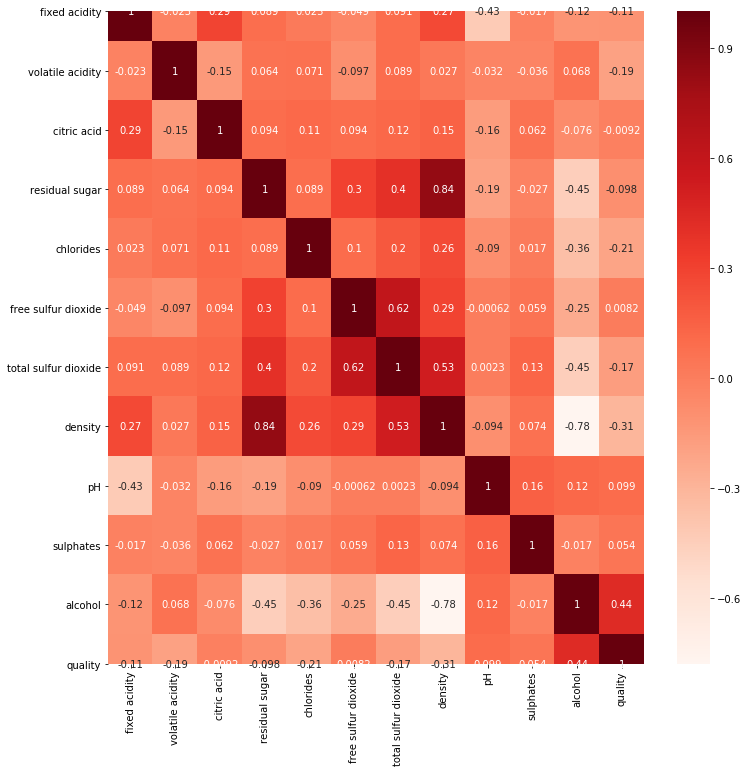

In [13]:
plt.figure(figsize=(12,12))
cor = wine.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Creating feature and target arrays

In [148]:
X = wine.drop('quality', axis = 1).values
y = wine['quality'].values

{'whiskers': [<matplotlib.lines.Line2D at 0x1cea7fa3d08>,
 'caps': [<matplotlib.lines.Line2D at 0x1cea7fa3408>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cea6eb16c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cea6e91848>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cea6e91908>],
 'means': []}

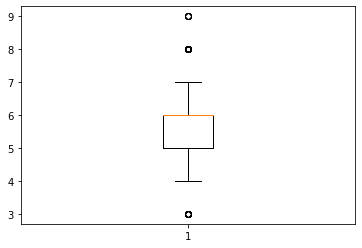

In [149]:
plt.boxplot(y)

## Creating train and test data 

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

## Starting with a simple model to:
+ get a sense of how challenging the problem is
+ many more things might go wrong with complex models
+ how much signal can we pull out using basic models

## Ridge regression
__Score history:__
- Test set RMSE of rf: 0.75

### Ridge parameters
- __alpha:__
    - regularization strength: the higher the value, the stronger the regularization
- __fit_intercept:__
    - weather to calculate an intercept for this model (e. g. not needed if centered) 
- __normalize:__
    - if `fit_intercept` and `normalize` are both `True` the regressor X will be normalized

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [151]:
# create parameter list for ridge regression
params_ridge = {
    'alpha':[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'normalize': [True, False],
    'fit_intercept': [True, False]
}

ridge = Ridge()

In [136]:
# setup cross validation parameter grid search
grid_ridge = GridSearchCV(estimator=ridge,
    param_grid=params_ridge,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [152]:
# fitting model on training data
grid_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [153]:
# extracting best parameters (can be used for finer hyper parameter tuning)
grid_ridge.best_params_

{'alpha': 0.05, 'fit_intercept': True, 'normalize': True}

In [154]:
# predicting values and calculating the rmse-score
y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)
rmse_test_lasso = MSE(y_test, y_pred_ridge)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_lasso))

Test set RMSE of rf: 0.76


In [155]:
print_metrics(y_pred_ridge, y_test)

,MAE,MAPE,RMSE,R2
0,0.59,0.1036,0.76,0.26


## Lasso regression
__Score history:__
- Test set RMSE of rf: 0.75

### Lasso Parameters:
- __alpha:__
    - constant that multiplies the L1-Norm
- __fit_intercept:__
    - weather to calculate an intercept for this model (e. g. not needed if centered) 
- __normalize:__
    - if `fit_intercept` and `normalize` are both `True` the regressor X will be normalized
- __positive:__
    - when `True` forces the coefficients to be positive

In [35]:
from sklearn.linear_model import Lasso

In [141]:
params_lasso = {
    'alpha': [0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False] 
}

lasso = Lasso()

In [142]:
grid_lasso = GridSearchCV(estimator=lasso,
    param_grid=params_lasso,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [143]:
grid_lasso.fit(X_train, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed:    3.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1, 1.1, 1.2],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [144]:
grid_lasso.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'positive': False}

In [145]:
y_pred_lasso = grid_lasso.predict(X_test)
rmse_test_lasso = MSE(y_test, y_pred_lasso)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_lasso))

Test set RMSE of rf: 0.76


In [146]:
print_metrics(y_pred_lasso, y_test)

,MAE,MAPE,RMSE,R2
0,0.59,0.1037,0.76,0.26


## Random Forest
__Score history:__
- Test set RMSE of rf: 0.60

### Random Forest parameters
- __n_estimators:__
    - number of trees in the forest
- __max_depth:__
    - maximum depth of the tree
- __min_samples_split:__
    - the min. number of samples required to split an internal node
- __min_samples_leaf:__
    - the minimum number of samples required to be at a leaf node
- __min_weight_fraction_leaf:__
    - the minimum weighted fraction of the sum total of weights
- __max_features:__
    - the number of features to consider when looking for the best split
- __min_impurity_decrease:__
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(random_state=42)

In [57]:
# take a look at the rf's parameters
print(rf.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [66]:
params_rf = {
    'n_estimators': [500, 1000],
    'max_depth': [None, 21, 22],
    'min_samples_split': [2]
}

grid_rf = GridSearchCV(estimator=rf,
    param_grid=params_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [67]:
grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   50.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [None, 21, 22], 'min_s

In [68]:
grid_rf.best_params_

{'max_depth': 22, 'min_samples_split': 2, 'n_estimators': 1000}

In [69]:
y_pred = grid_rf.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Test set RMSE of rf: 0.60


In [70]:
print_metrics(y_pred, y_test)

,MAE,MAPE,RMSE,R2
0,0.43,0.0762,0.6,0.53


## Creating SVM
__Score history:__
- Test set RMSE of rf: 0.70

### SVM parameters
- __c:__
    - penalty parameeter (higher => overfitting)
- __shrinking:__
    - weather to use the shrinking heuristic
- __kernel:__
    - specifies the kernel type

In [71]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [72]:
scaler = RobustScaler()
svr = SVR()

In [89]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [90]:
pipe = make_pipeline(scaler, svr)

In [91]:
params_svr = {'svr__C': [1.0, 1.1, 1.2, 1.3, 1.4],
 'svr__kernel': ['rbf', 'linear', 'poly', 'rbf', 'sigmoid'],
 'svr__shrinking': [True, False]}

grid_svr = GridSearchCV(estimator=pipe,
    param_grid=params_svr,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [92]:
grid_svr.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.0min finished
C:\Users\rapha\Anaconda3\envs\DatasetDescription\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('svr',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                   

In [77]:
grid_svr.best_params_

{'svr__C': 1.1, 'svr__kernel': 'rbf', 'svr__shrinking': False}

In [76]:
y_pred_svr = grid_svr.predict(X_test)
rmse_test_svr = MSE(y_test, y_pred_svr)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_svr))


Test set RMSE of rf: 0.70


In [87]:
print_metrics(y_pred_svr, y_test)

,MAE,MAPE,RMSE,R2
0,0.52,0.0917,0.7,0.36


## Creating a GradientBoostingRegressor
__Score history:__
- Test set RMSE of rf: 0.59
- Test set RMSE of rf: 0.58

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
gbt = GradientBoostingRegressor(random_state=42)


In [116]:
params_gbt = {
'n_estimators': [400, 500, 600],
'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
'max_features': ['log2'],
'learning_rate': [0.02, 0.05, 0.1],
'subsample': [0.8, 0.7, 0.6]
    
}
# Instantiate 'grid_rf'
grid_gbt = GridSearchCV(estimator=gbt,
param_grid=params_gbt,
cv=3,
scoring='neg_mean_squared_error',
verbose=1,
n_jobs=-1)

In [117]:
grid_gbt.fit(X_train, y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  4.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [118]:
grid_gbt.best_params_

{'learning_rate': 0.02,
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 500,
 'subsample': 0.6}

In [122]:
best_model = grid_gbt.best_estimator_
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.61


In [123]:
print_metrics(y_pred, y_test)

,MAE,MAPE,RMSE,R2
0,0.42,0.0754,0.61,0.53


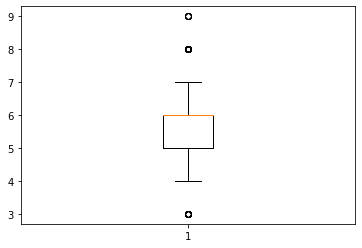

In [121]:
plt.boxplot(y)
plt.savefig('y_boxplot.png')

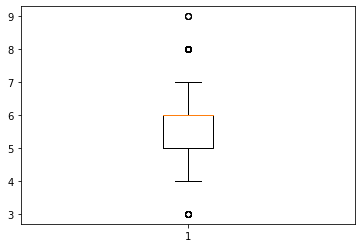

In [114]:
plt.boxplot(y_train)
plt.savefig('y_train_boxplot.png')
